In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

dataset=pd.read_csv('covid_data.csv')
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192067,ZWE,Africa,Zimbabwe,2022-06-02,253051.0,177.0,200.714,5508.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192068,ZWE,Africa,Zimbabwe,2022-06-03,253236.0,185.0,182.429,5509.0,1.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192069,ZWE,Africa,Zimbabwe,2022-06-04,253236.0,0.0,182.429,5509.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192070,ZWE,Africa,Zimbabwe,2022-06-05,253338.0,102.0,178.000,5510.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [2]:
dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
dataset.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
192067,ZWE,Africa,Zimbabwe,2022-06-02,253051.0,177.0,200.714,5508.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192068,ZWE,Africa,Zimbabwe,2022-06-03,253236.0,185.0,182.429,5509.0,1.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192069,ZWE,Africa,Zimbabwe,2022-06-04,253236.0,0.0,182.429,5509.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192070,ZWE,Africa,Zimbabwe,2022-06-05,253338.0,102.0,178.000,5510.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192071,ZWE,Africa,Zimbabwe,2022-06-06,253508.0,170.0,202.286,5513.0,3.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [4]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.845210e+05,1.842300e+05,1.830560e+05,1.660370e+05,166001.000000,164838.000000,183670.000000,183379.000000,182210.000000,165199.000000,...,119706.000000,118065.000000,77762.000000,140427.000000,179621.000000,154188.000000,6.553000e+03,6553.000000,6553.000000,6553.000000
mean,3.321440e+06,1.231478e+04,1.236325e+04,6.498894e+04,157.424058,158.398118,41902.837235,185.434375,185.829797,590.661480,...,10.643519,32.792406,50.921468,3.068617,73.649249,0.725205,4.093095e+04,9.773072,15.594497,1117.569401
std,2.086271e+07,8.711084e+04,8.558753e+04,3.385542e+05,788.984532,772.493838,77897.463831,946.257944,617.087990,876.043455,...,10.580264,13.530173,31.856101,2.520094,7.449497,0.149730,1.138387e+05,16.007568,28.965876,1563.316733
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.725000e+03,0.000000e+00,6.714000e+00,9.400000e+01,0.000000,0.143000,789.781250,0.000000,1.490000,23.602500,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-1.100000e+01,-0.120000,-0.280000,-6.412607
50%,3.600400e+04,7.000000e+01,1.005710e+02,9.230000e+02,1.000000,2.000000,6573.637500,10.158000,19.088500,165.649000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,4.269400e+03,6.570000,7.460000,574.011450
75%,3.816670e+05,1.024000e+03,1.134607e+03,8.495000e+03,17.000000,19.143000,52084.443750,101.750000,128.946750,852.914000,...,19.300000,41.300000,83.241000,4.000000,79.070000,0.845000,2.786380e+04,14.700000,21.800000,1794.278748
max,5.323506e+08,4.079835e+06,3.437236e+06,6.300059e+06,18151.000000,14795.286000,706541.904000,208049.887000,37617.428000,6392.768000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9725.192865


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192072 entries, 0 to 192071
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    192072 non-null  object 
 1   continent                                   180907 non-null  object 
 2   location                                    192072 non-null  object 
 3   date                                        192072 non-null  object 
 4   total_cases                                 184521 non-null  float64
 5   new_cases                                   184230 non-null  float64
 6   new_cases_smoothed                          183056 non-null  float64
 7   total_deaths                                166037 non-null  float64
 8   new_deaths                                  166001 non-null  float64
 9   new_deaths_smoothed                         164838 non-null  float64
 

In [6]:
# select columns as according to locations
df = dataset.query("location in ('Nepal','India','China')")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
35527,CHN,Asia,China,2020-01-22,547.0,NaN,NaN,17.0,NaN,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35528,CHN,Asia,China,2020-01-23,639.0,92.0,NaN,18.0,1.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35529,CHN,Asia,China,2020-01-24,916.0,277.0,NaN,26.0,8.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35530,CHN,Asia,China,2020-01-25,1399.0,483.0,NaN,42.0,16.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35531,CHN,Asia,China,2020-01-26,2062.0,663.0,NaN,56.0,14.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121612,NPL,Asia,Nepal,2022-06-02,979163.0,11.0,8.286,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.30,70.78,0.602,NaN,NaN,NaN,NaN
121613,NPL,Asia,Nepal,2022-06-03,979182.0,19.0,9.857,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.30,70.78,0.602,NaN,NaN,NaN,NaN
121614,NPL,Asia,Nepal,2022-06-04,979190.0,8.0,10.286,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.30,70.78,0.602,NaN,NaN,NaN,NaN
121615,NPL,Asia,Nepal,2022-06-05,979199.0,9.0,10.286,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.30,70.78,0.602,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='location', ylabel='total_cases'>

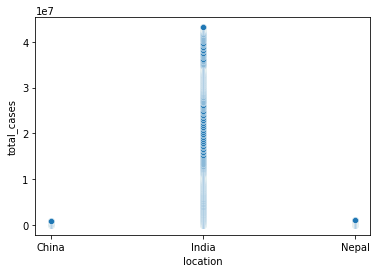

In [7]:
# using seaborn
sb.scatterplot(data=df, x="location", y="total_cases")


<AxesSubplot:xlabel='location', ylabel='total_deaths'>

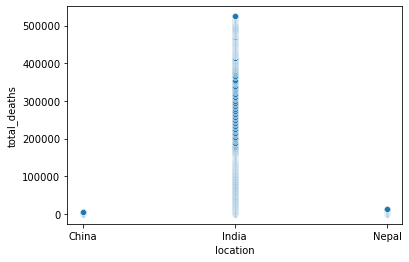

In [8]:
sb.scatterplot(data=df, x="location", y="total_deaths")


<AxesSubplot:xlabel='total_cases', ylabel='total_deaths'>

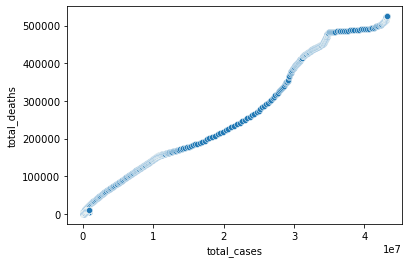

In [9]:
sb.scatterplot(data=df, x="total_cases", y="total_deaths")


<AxesSubplot:xlabel='total_deaths', ylabel='total_cases'>

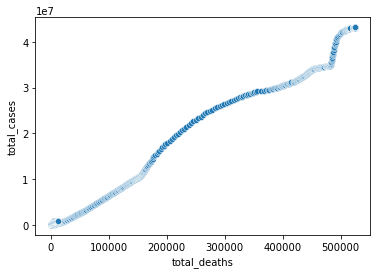

In [10]:
sb.scatterplot(data=df, x="total_deaths", y="total_cases")
